In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import chi2_contingency, f_oneway
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

In [2]:
# Loading the dataset into the notebook

data = pd.read_csv("lms-Copy1.csv")
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
0,16,18,1,4,4,3,104,37,5,19,5.0,2.94,8,0,0.00,15.94
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,441,4,0,0,0,0,1,0,0,12,0.0,0.00,0,0,0.00,0.00
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [3]:
# Removing data that contains 0 in the final_exam score

data = data[data['final_exam'] != 0]
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
5,21,11,0,2,2,2,95,11,0,3,2.0,0.00,0,0,30.50,32.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,438,17,1,2,2,8,86,14,0,29,0.0,4.12,0,19,34.67,57.78
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [4]:
# Encoding categorical variables

label_encoder = LabelEncoder()
data['user_id'] = label_encoder.fit_transform(data['user_id'])
data['quiz_1'] = label_encoder.fit_transform(data['quiz_1'])
data['quiz_2'] = label_encoder.fit_transform(data['quiz_2'])
data['assignment'] = label_encoder.fit_transform(data['assignment'])
data['project'] = label_encoder.fit_transform(data['project'])
data['final_exam'] = label_encoder.fit_transform(data['final_exam'])

C:\Users\Claude\AppData\Local\Temp\ipykernel_8188\377024350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_id'] = label_encoder.fit_transform(data['user_id'])
C:\Users\Claude\AppData\Local\Temp\ipykernel_8188\377024350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quiz_1'] = label_encoder.fit_transform(data['quiz_1'])
C:\Users\Claude\AppData\Local\Temp\ipykernel_8188\377024350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [5]:
# Splitting data into features and target variable

X = data[['assignments_viewed', 'assignments_submitted', 'quiz_started', 'quiz_submitted', 
          'quiz_reviewed', 'quiz_viewed', 'forums_viewed', 'page_views', 'resources_viewed','quiz_1','quiz_2','assignment','project']]
y = data['final_exam']  # Target variable

In [6]:
# Splitting the dataset into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train Decision Tree Model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# Predicting
y_pred = model.predict(X_test)

# Regression Evaluation Metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 26.346153846153847
Mean Squared Error: 1028.5
Root Mean Squared Error: 32.07023542164915
R-squared: -1.140570928929447


In [9]:
# Checking feature significance

categorical_features = ['user_id','quiz_1','quiz_2','assignment','project','final_exam']
for feature in categorical_features:
    chi2, p, _, _ = chi2_contingency(pd.crosstab(data[feature], data['total_score']))
    print(f"Chi-square test for {feature}: p-value = {p}")

continuous_features = ['assignments_viewed', 'assignments_submitted', 'quiz_started', 'quiz_submitted', 
          'quiz_reviewed', 'quiz_viewed', 'forums_viewed', 'page_views', 'resources_viewed']
for feature in continuous_features:
    f_stat, p = f_oneway(data[feature][data['total_score']== 0], data[feature][data['total_score'] == 1])
    print(f"ANOVA for {feature}: p-value = {p}")

Chi-square test for user_id: p-value = 0.24003364157494628
Chi-square test for quiz_1: p-value = 0.4209142354555004
Chi-square test for quiz_2: p-value = 0.30204005591987676
Chi-square test for assignment: p-value = 0.4000634316297612
Chi-square test for project: p-value = 0.3192925978290993
Chi-square test for final_exam: p-value = 0.20267364788746714
ANOVA for assignments_viewed: p-value = nan
ANOVA for assignments_submitted: p-value = nan
ANOVA for quiz_started: p-value = nan
ANOVA for quiz_submitted: p-value = nan
ANOVA for quiz_reviewed: p-value = nan
ANOVA for quiz_viewed: p-value = nan
ANOVA for forums_viewed: p-value = nan
ANOVA for page_views: p-value = nan
ANOVA for resources_viewed: p-value = nan


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


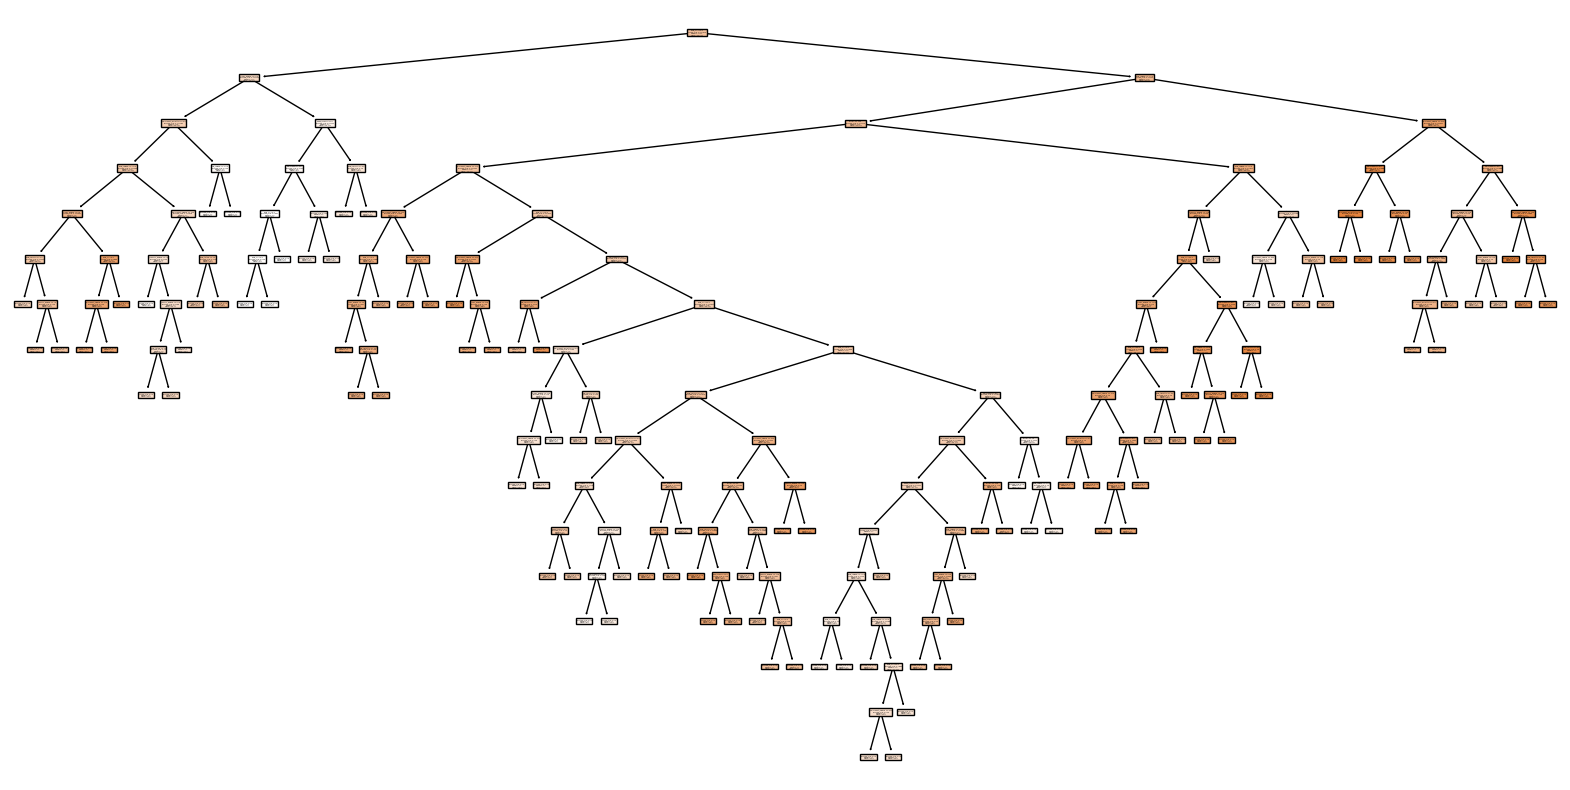

In [10]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=X.columns.tolist(), filled=True)
plt.show()

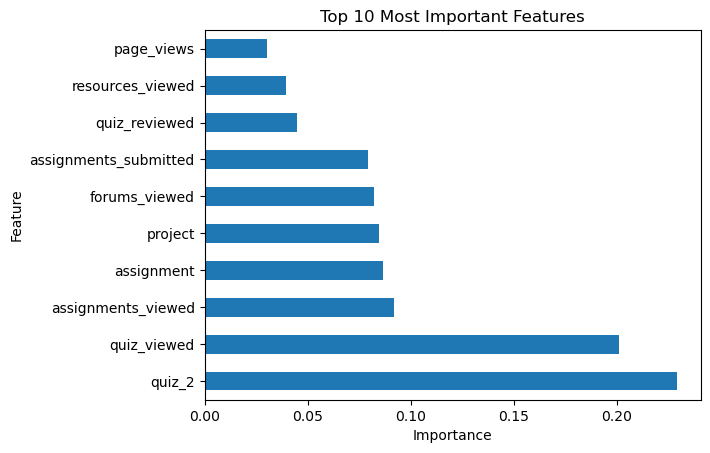

In [11]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

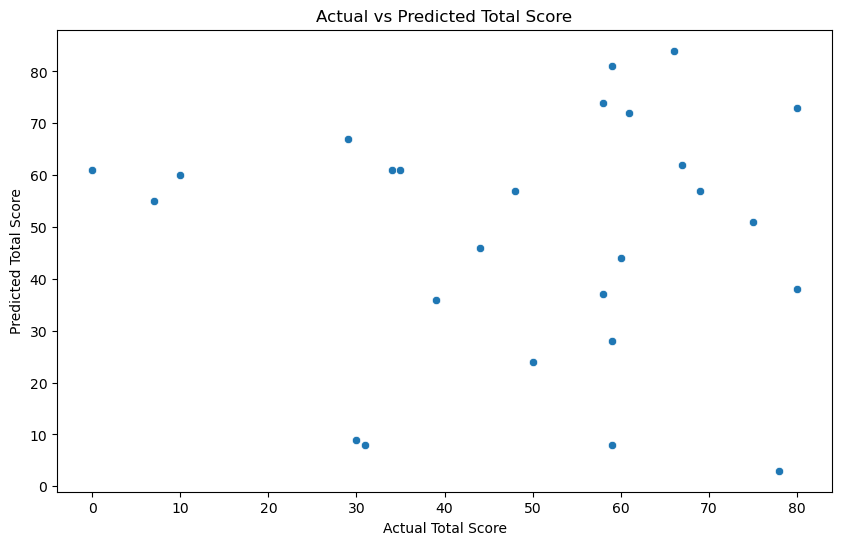

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Actual vs Predicted Total Score')
plt.show()